@author: Javier Flores




# Regresión 
# K-vecinos más cercanos (KNN)
<br> 

## Visualización y Preprocesamiento de Datos  

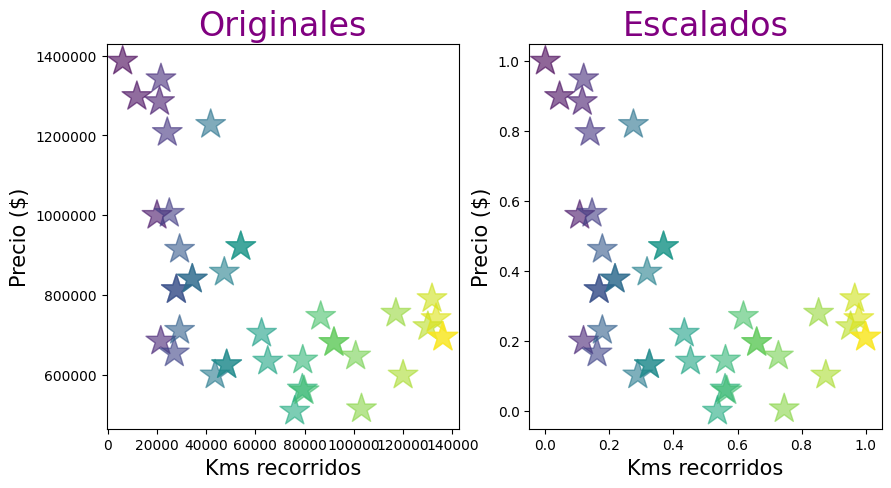

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Cargar datos 
carros = pd.read_csv("carros.csv")

# Graficar datos crudos: kms vs precio
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 2, 1)

ax.scatter(carros["kms"], carros["precio"], marker="*",
           s=500, c=range(carros["kms"].size), alpha=0.6)

ax.set_title("Originales", size=24, color="purple")
ax.set_ylabel("Precio ($)", size=15)
ax.set_xlabel("Kms recorridos", size=15)
ax.ticklabel_format(style="plain")


# Escalamiento de los datos 
escala_kms = preprocessing.MinMaxScaler()
escala_precio = preprocessing.MinMaxScaler()
kms = escala_kms.fit_transform(carros["kms"].values.reshape(-1, 1))
precio = escala_precio.fit_transform(carros["precio"].values.reshape(-1, 1))


# Graficar datos escalados: kms vs precio
ax = fig.add_subplot(1, 2, 2)

ax.scatter(kms, precio, marker="*", 
           s=500, c=range(kms.size), alpha=0.6)

ax.set_title("Escalados", size=24, color="purple")
ax.set_ylabel("Precio ($)", size=15)
ax.set_xlabel("Kms recorridos", size=15)
ax.ticklabel_format(style="plain")

plt.show()

In [2]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(kms, precio)

kms_instancia = escala_kms.transform([[20000]])
precio_instancia = knn.predict(kms_instancia)
escala_precio.inverse_transform(precio_instancia)

array([[990048.]])

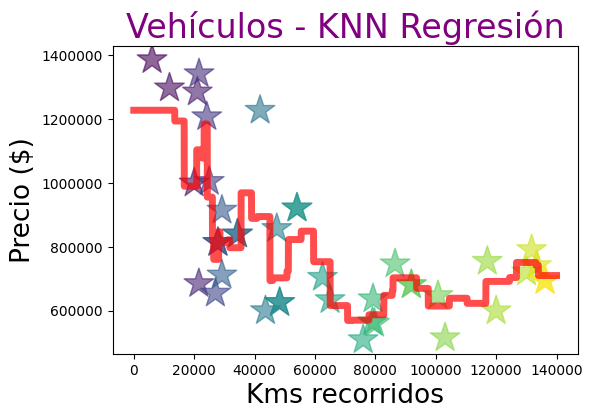

In [5]:
# Múltiples regresiones de los valores dentro del rango
kms_instancias = escala_kms.transform(np.arange(140000).reshape(-1, 1))
precio_instancias = knn.predict(kms_instancias)
todas = escala_precio.inverse_transform(precio_instancias)
todas = todas.reshape(1, -1)

# Graficar los resultados de las múltiples regresiones
fig = plt.figure(figsize=(6, 4))

plt.plot(np.arange(140000), todas.reshape(1, -1)[0], 
        linewidth=5, color="red", alpha=0.7)

plt.scatter(carros["kms"], carros["precio"], marker="*",
            s=500, c=range(carros["kms"].size), alpha=0.6)

plt.title("Vehículos - KNN Regresión", size=24, color="purple")
plt.ylabel("Precio ($)", size=19)
plt.xlabel("Kms recorridos", size=19)
plt.ticklabel_format(style="plain")
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# Regresores KNN para diferentes vecinos 
<img src="imagenes/knn_diferentes_k.png" width="350" height="600" style="vertical-align:left">